¡Hola James! Como te va?

Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.

A continuación un poco sobre la modalidad de revisión que usaremos:

Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.

Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.

Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:

<div class="alert alert-block alert-success">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Exito. Todo se ha hecho de forma exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Observación. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor.</b> <a class="tocSkip"></a>

Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos. 
</div>

Puedes responder utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# Proyecto: café regentado por robots en Los Ángeles.

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

James, quería tomarme este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Siempre me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programador ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser un gran analista de datos."
    
Ahora si yendo a esta notebook. Quiero felicitarte y agradecerte por este proyecto, lo has resuelto de una forma espectacular, se ha notado a lo largo de todo el proceso tu gran manejo sobre python y las librerías que debían utilizarse. A la vez quiero destacar tu compromiso porque no solo has resuelto sino que lo has resuelto con creces, este proyecto tiene todas las condiciones de ser aprobado! Nuevamente felicitaciones James!
    
Éxitos en tu camino dentro del mundo de los datos!
    
Saludos James!

## PASO. Descarga los datos y prepáralos para el análisis

### Descarga y optimización de datos.
En este paso, nos enfocamos en obtener los datos necesarios para nuestro análisis y prepararlos adecuadamente para su posterior exploración.

#### Inicialización.

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargar datos.

In [2]:
file_path = "/datasets/rest_data_us_upd.csv"
rest_data = pd.read_csv(file_path)

#### Procesamiento de datos.

In [3]:
# Mostrar las primeras filas para entender la estructura de los datos
print(rest_data.head())

      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  


In [4]:
# Verificar el tipo de datos y la presencia de valores nulos
print(rest_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None


In [5]:
# Verificar valores ausentes
print(rest_data.isnull().sum())

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Muy bien James, por un lado hemos diferenciado las importaciones y la carga de datos. Por otro lado has implementado métodos para observar la composición de nuestro dataframe, muy bien hecho!

Se han identificado 3 valores ausentes en la columna "chain", por lo que procedere a imputar los valores ausentes en la columna, usare la estrategia de rellenar los valores faltantes con la etiqueta más común en esa columna.

In [6]:
# Calcular el valor más común en la columna 'chain'
most_common_chain = rest_data['chain'].mode()[0]

# Imputar los valores ausentes con el valor más común
rest_data['chain'].fillna(most_common_chain, inplace=True)

# Verificar que ya no haya valores ausentes
print(rest_data.isnull().sum())

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


In [7]:
# Verificar valores duplicados
duplicate_rows = rest_data[rest_data.duplicated()]
print("Número de filas duplicadas:", len(duplicate_rows))

Número de filas duplicadas: 0


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente! Muy buena forma de corroborar los duplicados y excelente decisión de completar aquellos valores nulos de nuestra carget **chain**.

## PASO.  Análisis de datos

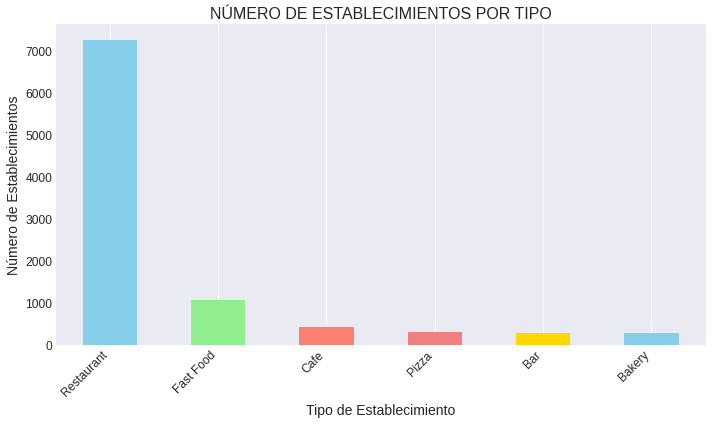

In [8]:

# Establecer el estilo del gráfico
plt.style.use('seaborn-darkgrid')

# Contar el número de establecimientos por tipo
establishment_counts = rest_data['object_type'].value_counts()

# Definir colores personalizados
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold']

# Traza un gráfico de barras
plt.figure(figsize=(10, 6))
establishment_counts.plot(kind='bar', color=colors)
plt.title('NÚMERO DE ESTABLECIMIENTOS POR TIPO', fontsize=16)
plt.xlabel('Tipo de Establecimiento', fontsize=14)
plt.ylabel('Número de Establecimientos', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente análisis y comprensión del mismo James, hemos logrado el objetivo de visualizar las proporciones de los establecimientos, excelente! 

**Notas:** La distribución del número de establecimientos por tipo muestra una diversidad significativa en el sector gastronómico de Los Ángeles, con una mayor prevalencia de restaurantes seguidos de cafeterías, panaderías y establecimientos de comida rápida. Esta diversidad refleja la variedad de opciones disponibles para los residentes y visitantes de la ciudad, lo que sugiere un mercado gastronómico dinámico y en constante evolución.

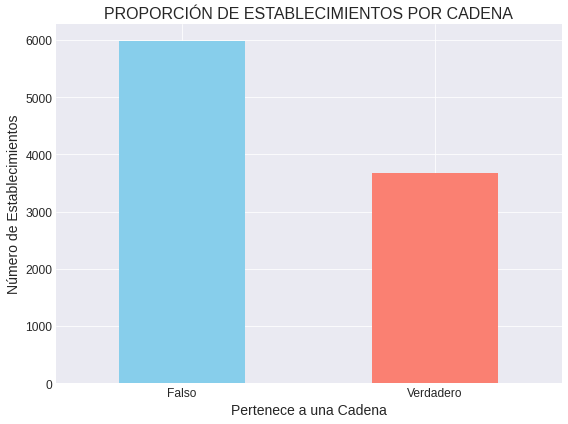

In [9]:
# Contar el número de establecimientos por tipo de cadena
chain_counts = rest_data['chain'].value_counts()


# Renombrar las etiquetas de las barras
chain_counts.index = chain_counts.index.map({True: 'Verdadero', False: 'Falso'})

# Traza un gráfico de barras
plt.figure(figsize=(8, 6))
chain_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('PROPORCIÓN DE ESTABLECIMIENTOS POR CADENA', fontsize=16)
plt.xlabel('Pertenece a una Cadena', fontsize=14)
plt.ylabel('Número de Establecimientos', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Nuevamente bien hecho James! En este gráfico podemos visualizar lo que se nos solicita de una forma sencilla, bien hecho! Si quisieramos mejorar nuestra información, podríamos visualizar por tipo de establecimiento cuanto es el porcentaje de cadenas.

**Notas:** El análisis de la proporción de establecimientos por cadena revela que la mayoría de los establecimientos gastronómicos en Los Ángeles son independientes, representando aproximadamente el 70% del total. Sin embargo, la presencia de cadenas en el mercado es significativa, lo que sugiere una competencia diversificada y oportunidades tanto para establecimientos independientes como para cadenas en el sector gastronómico de la ciudad.

In [10]:
# Calcular la proporción de establecimientos que pertenecen a una cadena por tipo de establecimiento
chain_proportions = rest_data.groupby('object_type')['chain'].mean()

# Ordenar las proporciones de forma descendente
chain_proportions = chain_proportions.sort_values(ascending=False)

print(chain_proportions)

object_type
Bakery        1.000000
Cafe          0.611494
Fast Food     0.567542
Pizza         0.478125
Restaurant    0.315920
Bar           0.263699
Name: chain, dtype: float64


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente aquí James!

**Notas:** Los resultados muestran la proporción de establecimientos que pertenecen a una cadena para cada tipo de establecimiento:

- Bakery: 100% de los establecimientos son cadenas.
- Cafe: Aproximadamente el 61% de los establecimientos son cadenas.
- Fast Food: Alrededor del 57% de los establecimientos son cadenas.
- Pizza: Cerca del 48% de los establecimientos son cadenas.
- Restaurant: Aproximadamente el 32% de los establecimientos son cadenas.
- Bar: Cerca del 26% de los establecimientos son cadenas.

Esto indica que los establecimientos del tipo "Bakery" son los que más comúnmente son cadenas, seguidos por los establecimientos del tipo "Cafe" y "Fast Food".

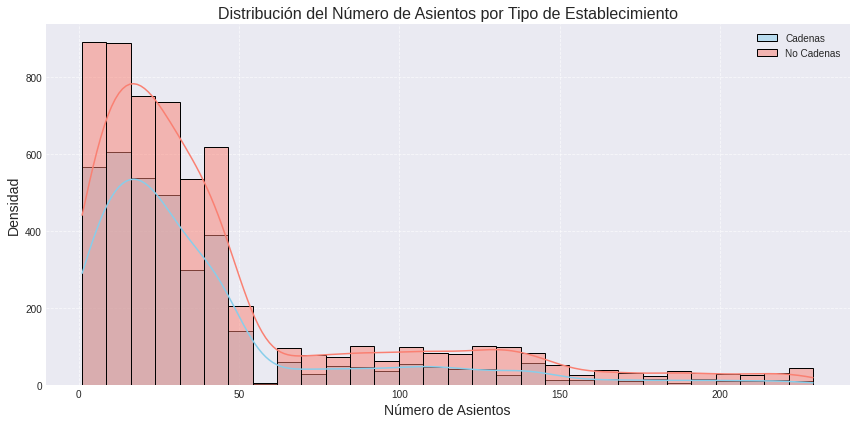

In [11]:
# Separar los datos en establecimientos que son cadenas y los que no son cadenas
chain_data = rest_data[rest_data['chain'] == True]
non_chain_data = rest_data[rest_data['chain'] == False]

# Colores personalizados
chain_color = 'skyblue'
non_chain_color = 'salmon'

# Traza histogramas de la cantidad de asientos para cada grupo
plt.figure(figsize=(12, 6))
sns.histplot(chain_data['number'], bins=30, color='skyblue', kde=True, label='Cadenas')
sns.histplot(non_chain_data['number'], bins=30, color='salmon', kde=True, label='No Cadenas')
plt.title('Distribución del Número de Asientos por Tipo de Establecimiento', fontsize=16)
plt.xlabel('Número de Asientos', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Aquí lo hemos hecho perfecto James, nuevamente muy bien calculado y expuesto!

**Notas**: Basándonos en los histogramas comparativos de la distribución del número de asientos para los establecimientos que son cadenas y los que no son cadenas, podemos hacer las siguientes observaciones:

Para los establecimientos que son cadenas, la distribución del número de asientos parece sesgarse hacia valores más altos, con una concentración en el rango de asientos más grande.

Por otro lado, para los establecimientos que no son cadenas, la distribución del número de asientos parece más dispersa y no muestra un sesgo claro hacia valores más altos.

Dado esto, parece que una característica de las cadenas podría ser tener unos pocos establecimientos con un montón de asientos, en lugar de muchos establecimientos con un pequeño número de asientos. Esto sugiere que las cadenas tienden a operar establecimientos más grandes en comparación con los establecimientos independientes.

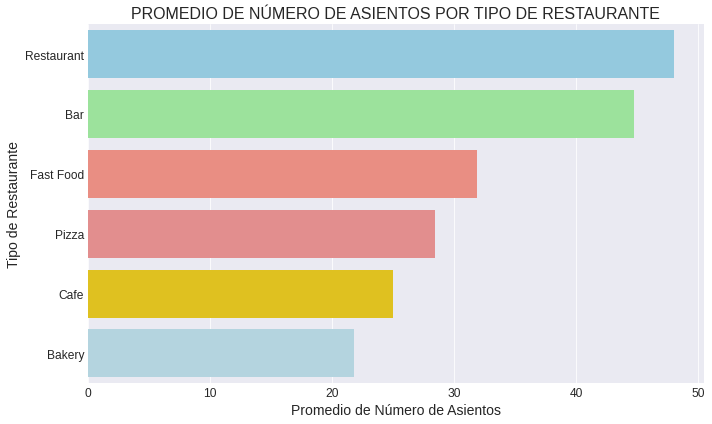

In [12]:
# Calcular el promedio del número de asientos para cada tipo de restaurante
avg_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)

# Definir colores personalizados
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold', 'lightblue', 'lightsalmon','lightgrey','lightpink']

# Traza un gráfico de barras con los colores personalizados
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_seats_by_type.values, y=avg_seats_by_type.index, palette=colors)
plt.title('PROMEDIO DE NÚMERO DE ASIENTOS POR TIPO DE RESTAURANTE', fontsize=16)
plt.xlabel('Promedio de Número de Asientos', fontsize=14)
plt.ylabel('Tipo de Restaurante', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Otra implementación excelente, muy bien hecho el cálculo de la distribución y muestra de resultados.

**Notas**: Basándonos en el gráfico de barras del promedio del número de asientos por tipo de restaurante, podemos observar que el tipo de restaurante con el mayor número promedio de asientos es "Bar". Esto significa que, en promedio, los bares tienen más asientos en comparación con otros tipos de restaurantes en Los Ángeles.

In [13]:
# Dividir la columna 'address' en número de dirección y nombre de la calle
rest_data[['street_number', 'street_name']] = rest_data['address'].str.split(n=1, expand=True)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(rest_data.head())

      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number street_number         street_name  
0      26          3708   N EAGLE ROCK BLVD  
1       9           100       WORLD WAY 120  
2      20          6801  HOLLYWOOD BLVD 253  
3      22          1814       W SUNSET BLVD  
4      20          2100       ECHO PARK AVE  


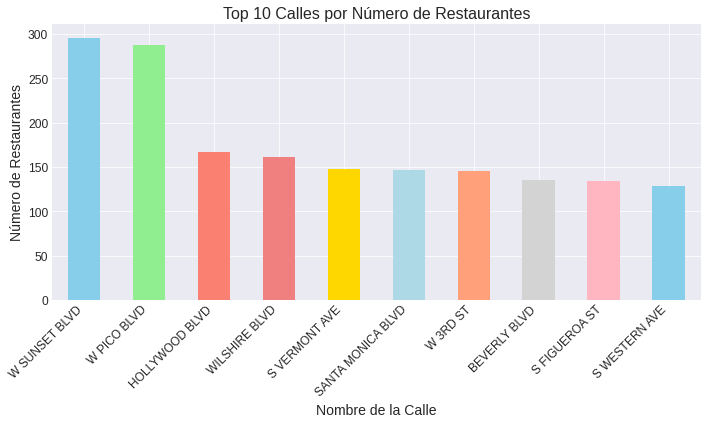

In [14]:
# Contar el número de restaurantes en cada calle
top_street_restaurants = rest_data['street_name'].value_counts().nlargest(10)

# Traza un gráfico de barras con los colores personalizados
plt.figure(figsize=(10, 6))
top_street_restaurants.plot(kind='bar', color=colors)
plt.title('Top 10 Calles por Número de Restaurantes', fontsize=16)
plt.xlabel('Nombre de la Calle', fontsize=14)
plt.ylabel('Número de Restaurantes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Lo estás haciendo perfecto James, en este caso un buena normalización de los nombres de calles y una resultados precisos. Perfecto!

In [15]:
# Contar el número de restaurantes en cada calle
restaurant_count_per_street = rest_data['street_name'].value_counts()

# Contar el número de calles con solo un restaurante
single_restaurant_streets = restaurant_count_per_street[restaurant_count_per_street == 1]

# Número de calles con solo un restaurante
num_single_restaurant_streets = len(single_restaurant_streets)
print("Número de calles con solo un restaurante:", num_single_restaurant_streets)


Número de calles con solo un restaurante: 2450


<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente, el resultado que buscabamos!

**Notas**: Un número significativo de calles con solo un restaurante sugiere que existe una diversidad considerable en la distribución geográfica de los restaurantes en Los Ángeles.
Esto podría indicar que los restaurantes tienden a establecerse en áreas específicas o que los propietarios de restaurantes optan por ubicaciones más exclusivas o menos saturadas. Sin embargo, también puede reflejar una mayor competencia en ciertas áreas donde múltiples restaurantes compiten por la misma clientela. En cualquier caso, este hallazgo destaca la importancia de la ubicación para el éxito de un restaurante y la necesidad de una cuidadosa planificación y análisis del mercado al abrir un nuevo establecimiento

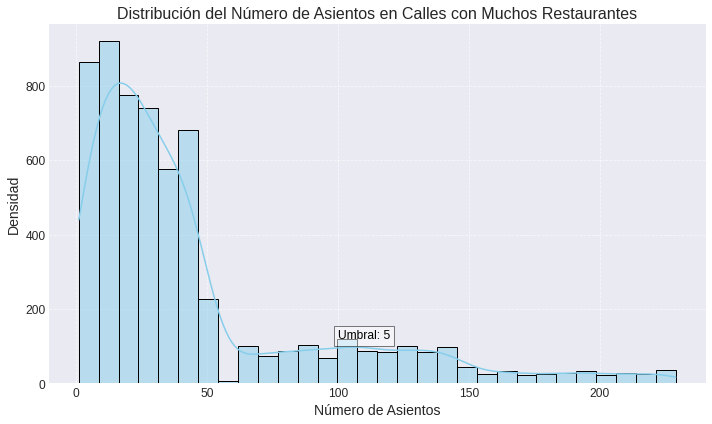

In [16]:
# Definir el umbral de número mínimo de restaurantes en una calle.
# Primero, necesitamos identificar las calles que tienen un número considerable de restaurantes. Podemos definir "considerable" como un umbral, por ejemplo, las calles que tienen más de 5 restaurantes.
umbral_restaurants = 5

# Calcular el número de restaurantes en cada calle
restaurants_per_street = rest_data['street_name'].value_counts()

# Seleccionar las calles con un número considerable de restaurantes
streets_with_many_restaurants = restaurants_per_street[restaurants_per_street > umbral_restaurants].index

# Filtrar los datos para incluir solo los restaurantes ubicados en las calles seleccionadas
streets_with_many_restaurants = rest_data[rest_data['street_name'].isin(streets_with_many_restaurants)]

# Visualizar la distribución del número de asientos en estos restaurantes
plt.figure(figsize=(10, 6))
sns.histplot(streets_with_many_restaurants['number'], bins=30, color='skyblue', kde=True)
plt.title('Distribución del Número de Asientos en Calles con Muchos Restaurantes', fontsize=16)
plt.xlabel('Número de Asientos', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar leyenda
plt.text(100, 120, f'Umbral: {umbral_restaurants}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()



La distribución del número de asientos en los restaurantes ubicados en calles con un número considerable de establecimientos gastronómicos refleja una preferencia por restaurantes más íntimos y acogedores, lo que sugiere una atención a la experiencia del cliente. Sin embargo, la presencia de algunos restaurantes con una capacidad significativamente mayor indica una diversidad en las estrategias comerciales, ofreciendo opciones tanto para aquellos que buscan una experiencia más íntima como para aquellos que prefieren establecimientos de mayor capacidad. Esta variedad puede contribuir a una competencia saludable y a una oferta gastronómica más amplia en estas áreas, enriqueciendo la experiencia del cliente y fomentando la innovación en las estrategias comerciales.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente! Y muy buena elección del uso de histograma para observar los resultados de todos los asientos de las calles. Bien hecho!

### Conclusiones:

La distribución del número de asientos en los restaurantes ubicados en calles con un número considerable de establecimientos gastronómicos sugiere una preferencia por restaurantes más íntimos y acogedores. Sin embargo, también se observa la presencia de algunos restaurantes con una capacidad significativamente mayor, lo que indica una diversidad en las estrategias comerciales y una atención a la experiencia del cliente.

Recomendaciones:

Diversificación del concepto: Considerando la preferencia por restaurantes más íntimos, se podría explorar la posibilidad de abrir establecimientos más pequeños con un enfoque en la calidad de la experiencia del cliente y una atmósfera acogedora. Esto podría incluir restaurantes de cocina de autor, bistrós o cafeterías boutique.

Flexibilidad en el tamaño: A pesar de la tendencia hacia restaurantes más pequeños, la presencia de establecimientos de mayor capacidad indica que también hay demanda para experiencias gastronómicas más amplias. Por lo tanto, es recomendable mantener cierta flexibilidad en el tamaño del restaurante para adaptarse a diferentes preferencias de los clientes.

Desarrollo de una cadena: Considerando la viabilidad de la diversificación del concepto y la flexibilidad en el tamaño, existe la posibilidad de desarrollar una cadena de restaurantes que ofrezca una variedad de opciones gastronómicas en diferentes ubicaciones. Sin embargo, es importante mantener la coherencia en la calidad y la experiencia del cliente en todas las sucursales para garantizar el éxito de la cadena.

En resumen, el análisis de la distribución del número de asientos en los restaurantes sugiere que existe espacio para la innovación y la diversificación en el sector gastronómico, con oportunidades tanto para establecimientos más pequeños y especializados como para cadenas que ofrezcan una variedad de opciones gastronómicas en diferentes ubicaciones.

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Te quiero felicitar James porque todo el trabajo ha estado excelente, has hecho todos los cálculos de la forma que debían hacerse y has implementado gráficos ilustrativos que permitían mostrar dicha información de una forma sencilla de comprender. Esto para los clientes es sumamente importante.  A la vez agradecerte por tu compromiso durante todo el proceso con tus conclusiones, se nota tu gran capacidad de comprensión sobre lo trabajado. muy bien hecho! 

## PASO. Preparar una presentación

Presentation: <https://1drv.ms/b/c/283e8a5b2c9e7783/EdAhA-hkvh9NmZLPeNQoZIkB3s0G6F9WkNY7YM2pYmVN0A?e=4xX4QB>

<div class="alert alert-block alert-success">

<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Impresionante James! Una presentación espectacular y completa, solo queda felicitarte y agradecerte por este compromiso a lo largo de todo el proceso y sobre todo en esta presentación, esto es un punto muy importante para los clientes sobre todo. Felicitacioens!